In [746]:
#load the important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [747]:
# Load the dataset from csv file
df = pd.read_csv("/content/laptop.csv")

#Perform The Exploratory Data Analysis

In [748]:
#print the top 5 row to analyze the data
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [749]:
df.tail(2)

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1301,1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,1302.0,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [750]:
df.sample(2)

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
345,345,345.0,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 2TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.4kg,60153.12
1171,1171,1171.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Intel UHD Graphics 620,Windows 10,2.1kg,61751.52


In [751]:
#check the columns name
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')

In [752]:
#check the shape of dataset
df.shape

(1303, 13)

In [753]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [754]:
#check the duplicate rows
df.duplicated().sum()

0

#Data Preprocessing
Data Cleaning and Feature Engineering

In [755]:
#check the missing values
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

There are null values and an unwanted columns in our dataset so we will drop that columns but first of all I'm going to create a copy of data to not disturb the original dataset and use them when it will be required.


In [756]:
#create the copy of data
df_data = df.copy()

In [757]:
df_data.head(2)

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


**Get Rid of Unnecessary Columns**

In [758]:
#get rid of unnecessary columns ('Unnamed: 0.1, 'Unnamed: 0')
df_data.drop(columns=["Unnamed: 0.1", "Unnamed: 0"], inplace = True) #made the changes parmanent with help of inplace function

In [759]:
df_data.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [760]:
df_data.shape

(1303, 11)

In [761]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 112.1+ KB


#Distribution of target variable

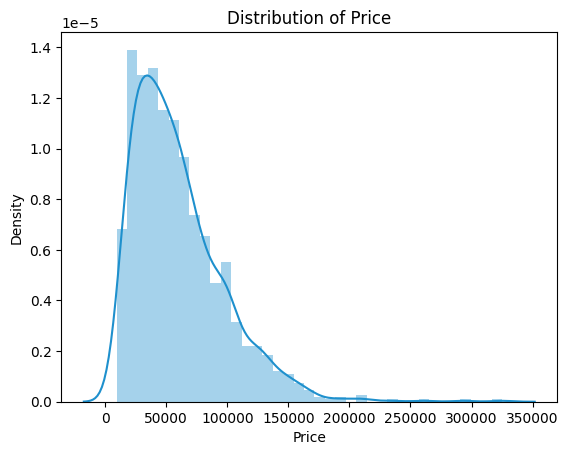

In [762]:
sns.distplot(df_data['Price'], color = '#1E90CD')
plt.title("Distribution of Price")
plt.show()

This is the positive skew. The majority of the data is located on the left side of the graph and tail extends to the right.

The mean (average) is greater than the Median (mean > median).

In [763]:
#check the missing values
df_data.isnull().sum()

Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

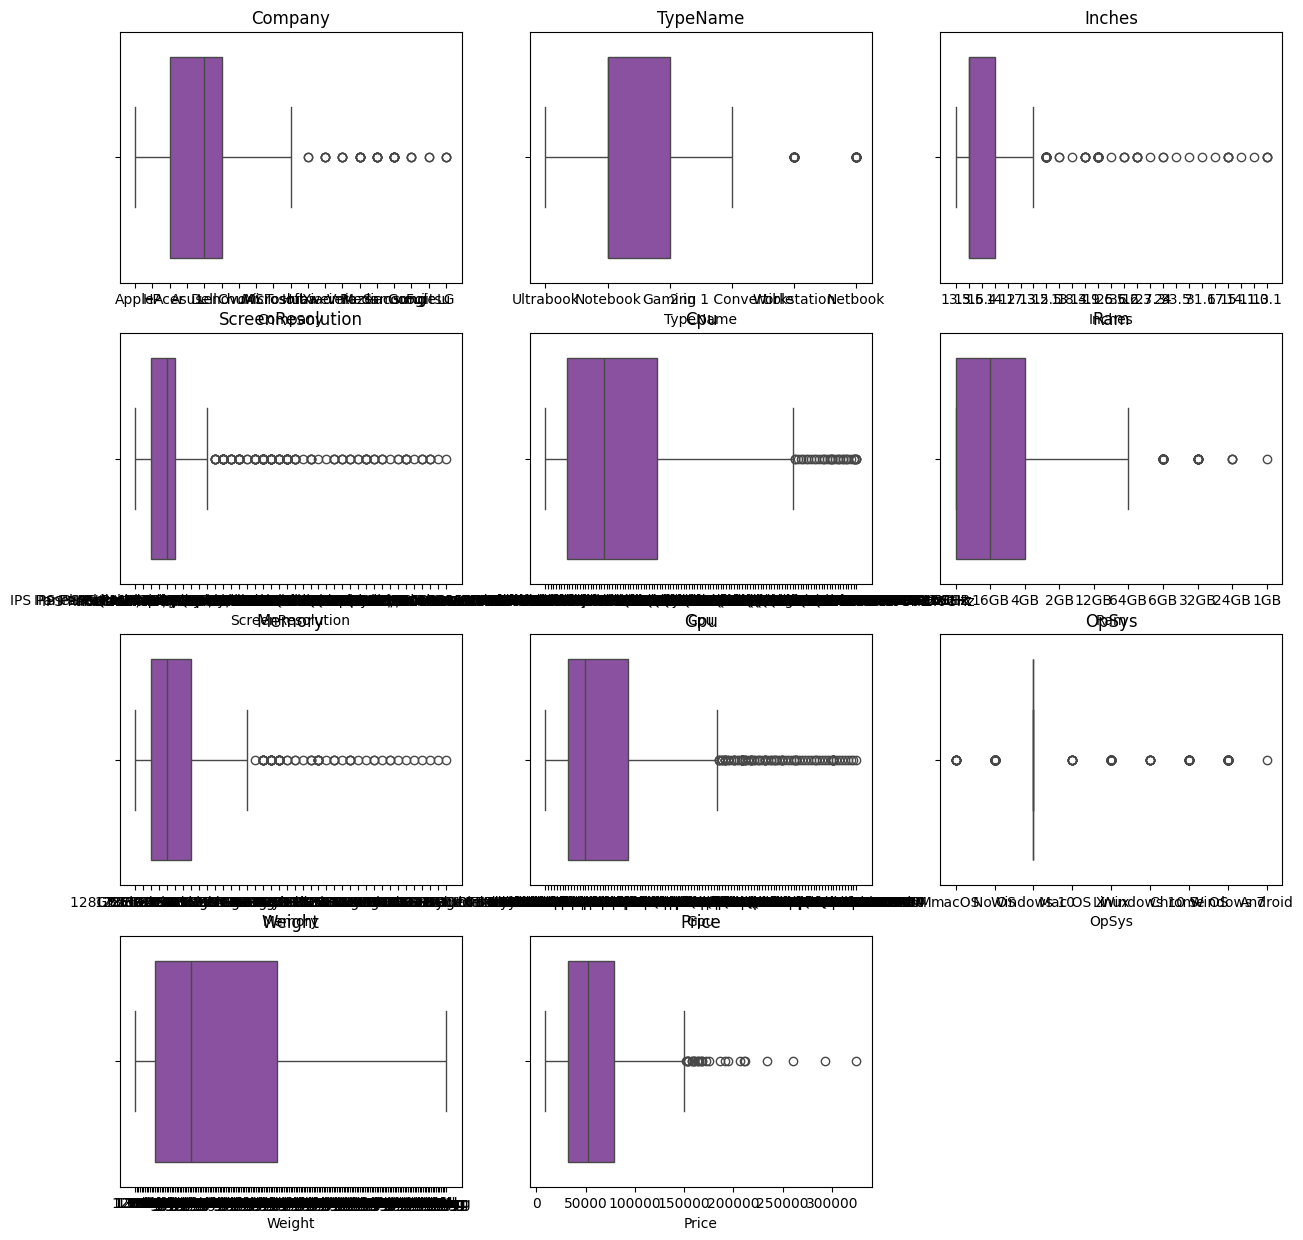

In [764]:
#check the outliers using plot
cols = ['Company', 'TypeName','Inches', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price']
plt.figure(figsize=(15, 15))
for i in range(11) :
    plt.subplot(4,3,i+1)

    sns.boxplot(x=df_data[cols[i]],color='#8E44AD')
    plt.title(cols[i])
plt.show()

There are outliers in all columns except the weight column.

In [765]:
# Fill the missing values
for column in df_data.columns:
  if column == 'Price':
    df_data[column] = df_data[column].fillna(df_data[column].median())
  else:
    df_data[column] = df_data[column].fillna(df_data[column].mode()[0])

In [766]:
df_data.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

There are no missing values in the dataset.

**Get rid of the unwanted values from rows.**

In [767]:
#find the unwanted values in rows
for column in df_data.columns:
  if '?' in df_data[column].values:
    print(df_data.loc[df[column] == '?'])
  else:
    None

    Company     TypeName Inches   ScreenResolution  \
476    Dell  Workstation      ?  Full HD 1920x1080   

                             Cpu  Ram     Memory                  Gpu  \
476  Intel Core i7 7700HQ 2.8GHz  8GB  256GB SSD  Nvidia Quadro M1200   

          OpSys  Weight      Price  
476  Windows 10  1.78kg  128298.24  
    Company  TypeName Inches   ScreenResolution                         Cpu  \
770    Dell  Notebook   15.6  Full HD 1920x1080  Intel Core i7 7500U 2.7GHz   

      Ram Memory                 Gpu       OpSys Weight       Price  
770  16GB      ?  AMD Radeon R7 M445  Windows 10  2.3kg  62938.0656  
    Company   TypeName Inches   ScreenResolution                         Cpu  \
208    Dell  Ultrabook   13.3  Full HD 1920x1080  Intel Core i7 8550U 1.8GHz   

     Ram     Memory                     Gpu       OpSys Weight     Price  
208  8GB  256GB SSD  Intel UHD Graphics 620  Windows 10      ?  77202.72  


In [768]:
#replace unwanted values with mode
df_data.at[476, 'Inches'] = df_data['Inches'].mode()[0]
df_data.at[770, 'Memory'] = df_data['Memory'].mode()[0]
df_data.at[208, 'Weight'] = df_data['Weight'].mode()[0]

These 3 rows had unwanted values and I replaced unwanted values with mode.

In [769]:
#coverting string numerical values to float
df_data['Inches'] = df_data['Inches'].astype('float')
df_data['Ram'] = df_data['Ram'].str.replace('GB', '').astype('int')
df_data['Weight'] = df_data['Weight'].str.replace('kg', '')

In [770]:
df_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [771]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 112.1+ KB


In [772]:
df_data.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [773]:
df_data.shape

(1303, 11)

#Check how some features (columns) will affect the pricing of laptops.

**1. Check company relationship with price**

In [774]:
df_data['Company'].value_counts()

Company
Lenovo       320
Dell         287
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: count, dtype: int64

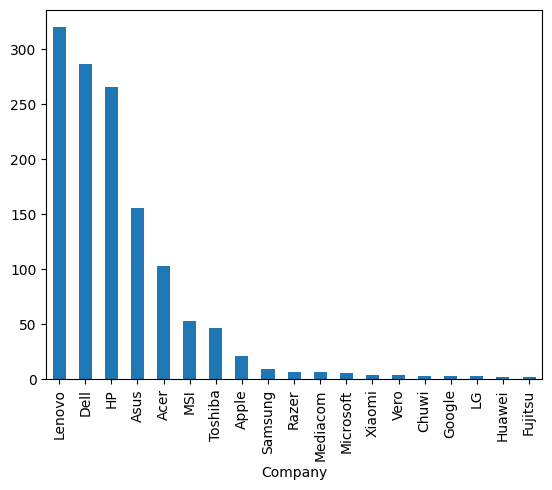

In [775]:
df_data['Company'].value_counts().plot(kind='bar')
plt.show()

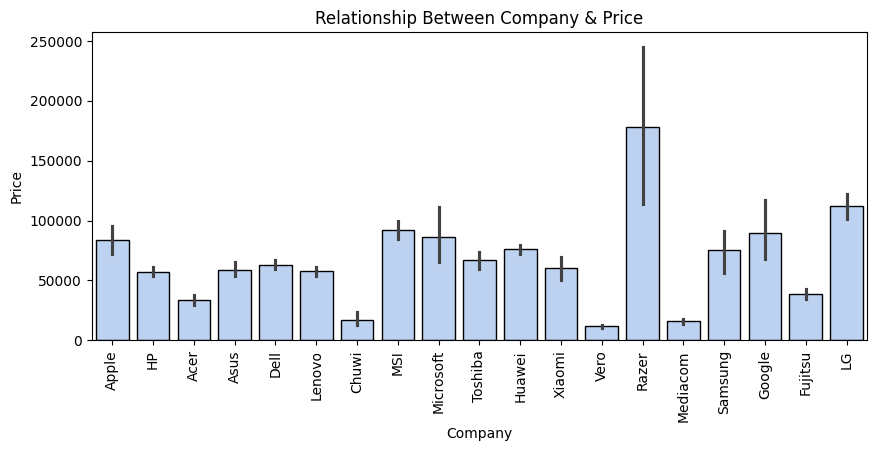

In [776]:
plt.figure(figsize=(10, 4))
sns.barplot(x=df_data['Company'],y=df_data['Price'], color = '#B4CFFA', edgecolor='black')
plt.xticks(rotation='vertical')
plt.title("Relationship Between Company & Price")
plt.show()


Razer company is most expensive after that Apple, LG, Microsoft, Google, MSI companies laptops are expensive and others are in the budget range.

**2. Type of laptop effect on price**

In [777]:
df_data['TypeName'].value_counts()

TypeName
Notebook              740
Gaming                203
Ultrabook             191
2 in 1 Convertible    116
Workstation            29
Netbook                24
Name: count, dtype: int64

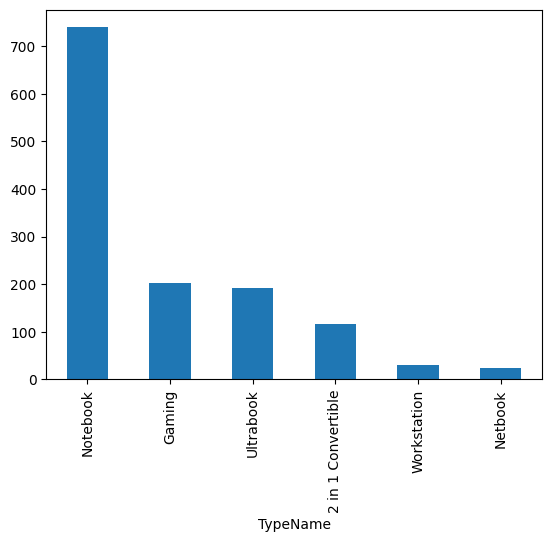

In [778]:
df_data['TypeName'].value_counts().plot(kind='bar')
plt.show()

Prominent people prefer notebooks because it's in the budget range and It has the highest count of notebooks.

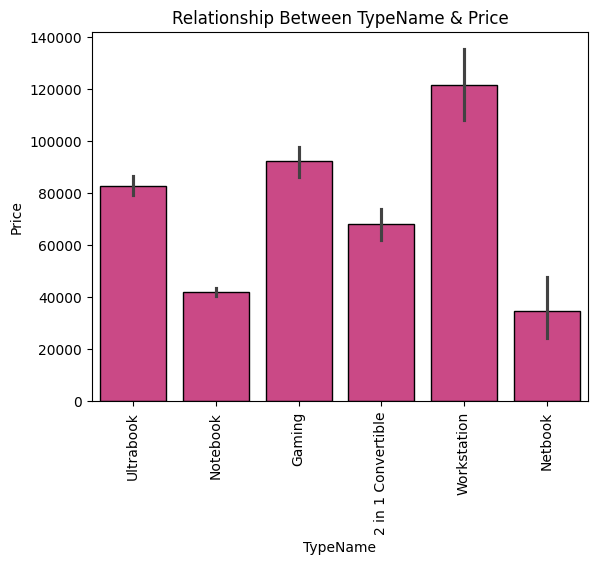

In [779]:
sns.barplot(x=df_data['TypeName'], y=df_data['Price'], color = '#E03385', edgecolor='black')
plt.xticks(rotation="vertical")
plt.title("Relationship Between TypeName & Price")
plt.show()

**3. Check the price vary with laptop size in inches**

In [780]:
df_data['Inches'].value_counts()

Inches
15.6    671
14.0    192
17.3    162
13.3    161
12.5     38
11.6     31
12.0      6
13.9      6
13.5      5
12.3      5
15.4      4
15.0      4
35.6      3
10.1      3
24.0      2
13.0      2
18.4      1
27.3      1
33.5      1
31.6      1
17.0      1
14.1      1
11.3      1
25.6      1
Name: count, dtype: int64

A scatter plot is used when both the columns are numerical.

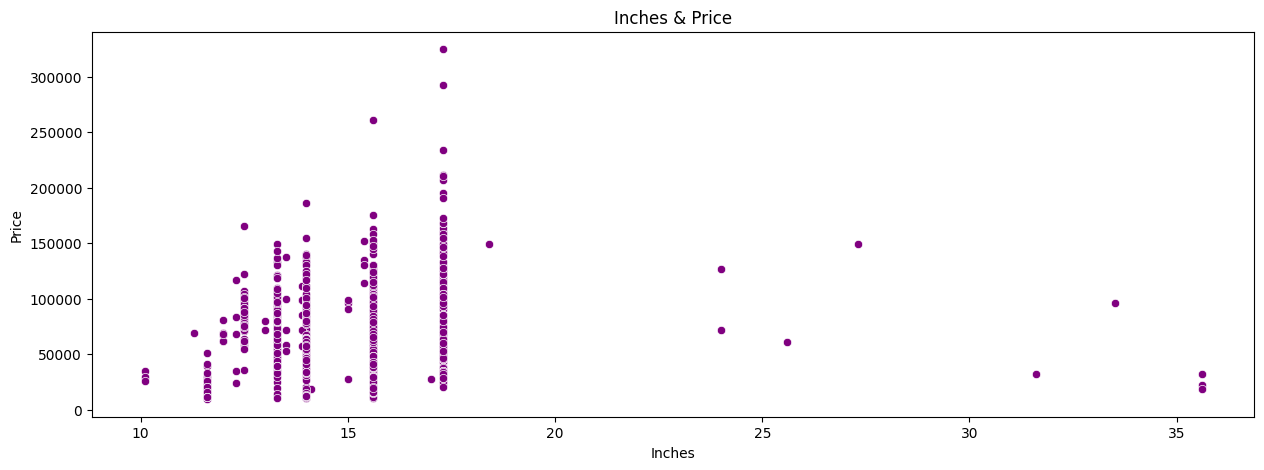

In [781]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x=df_data['Inches'],y=df_data['Price'], c = 'purple')
plt.title("Inches & Price")
plt.show()

From the above plot, we can conclude that there is a relationship but not a strong relationship between the price and inches column.

**4. Screen Resolution**

In [782]:
df_data['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                525
1366x768                                         274
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         52
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In the Screen resolution, we can see that we have a lot of parameters thus we will create separate parameters from this column and then drop the original column.

In [783]:
df_data['Touchscreen'] = df_data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [784]:
df_data.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
982,Lenovo,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6,256GB SSD,AMD Radeon 530,Windows 10,2.2,29250.7200,0
913,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.04,54291.7872,0
971,Dell,Ultrabook,14.0,Touchscreen 2560x1440,Intel Core i7 6600U 2.6GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.5,104587.5744,1
696,Lenovo,2 in 1 Convertible,14.0,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.38,93186.7200,1
1069,Apple,Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M 1.1GHz,8,256GB Flash Storage,Intel HD Graphics 515,Mac OS X,0.920,69264.0000,0


In [785]:
df_data['Touchscreen'].value_counts()

Touchscreen
0    1118
1     185
Name: count, dtype: int64

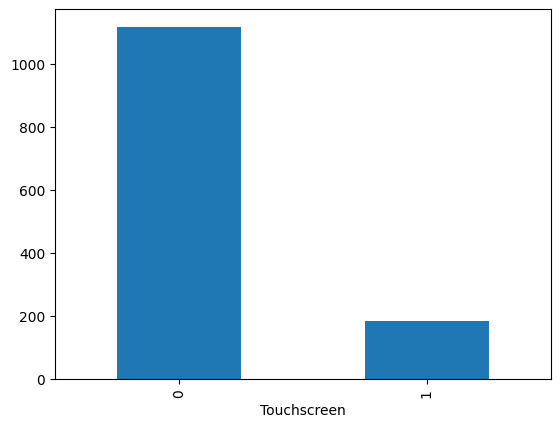

In [786]:
df_data['Touchscreen'].value_counts().plot(kind='bar')
plt.show()

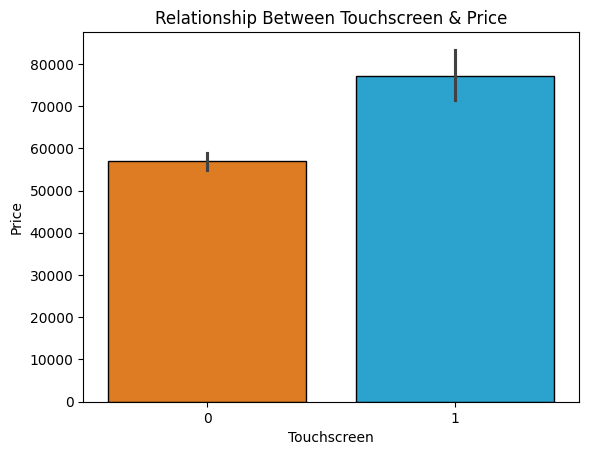

In [787]:
sns.barplot(x=df_data['Touchscreen'], y=df_data['Price'], palette=['#fc7b03','#11AFEA'], edgecolor='black')
plt.title("Relationship Between Touchscreen & Price")
plt.show()

IPS Panel

In [788]:
#extract IPS column
df_data['Ips'] = df_data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

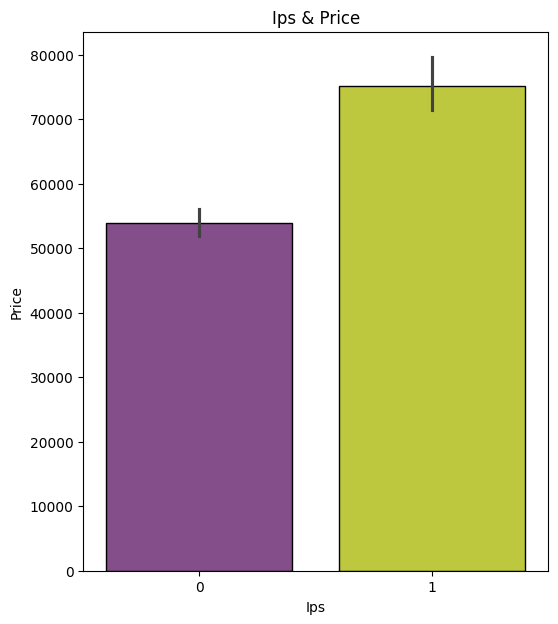

In [789]:
plt.figure(figsize=(6,7))
sns.barplot(x=df_data['Ips'],y=df_data['Price'], palette=['#8B4494','#D2DF27'], edgecolor='black')
plt.title("Ips & Price")
plt.show()

In data observing the relationship against the price of IPS channel laptops is high.

In [790]:
#drop the screenresolution column
df_data.drop(columns=['ScreenResolution'],inplace=True)

In [791]:
df_data.head(2)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0


**5. CPU Variable & Price**

In [792]:
#first we will extract Name of CPU which is first 3 words from Cpu column and then we will check which processor it is
def fetch_processor(x):
  cpu_name = " ".join(x.split()[0:3])
  if cpu_name == 'Intel Core i7' or cpu_name == 'Intel Core i5' or cpu_name == 'Intel Core i3':
    return cpu_name
  elif cpu_name.split()[0] == 'Intel':
    return 'Other Intel Processor'
  else:
    return 'AMD Processor'
df_data['Cpu_brand'] = df_data['Cpu'].apply(lambda x: fetch_processor(x))

In [793]:
df_data.Cpu_brand.value_counts()

Cpu_brand
Intel Core i7            515
Intel Core i5            440
Other Intel Processor    151
Intel Core i3            134
AMD Processor             63
Name: count, dtype: int64

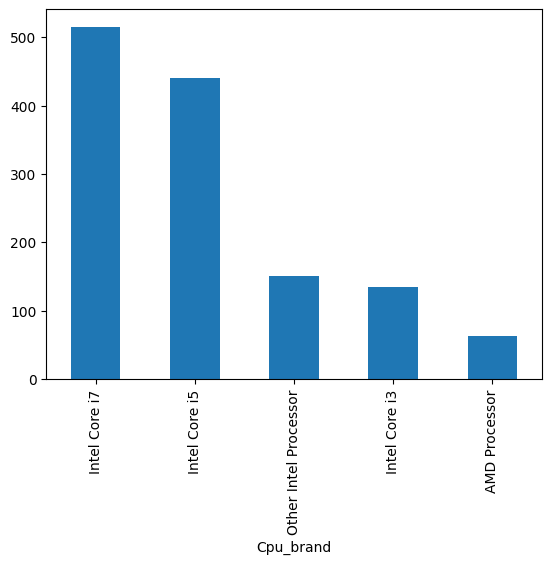

In [794]:
df_data['Cpu_brand'].value_counts().plot(kind='bar')
plt.show()

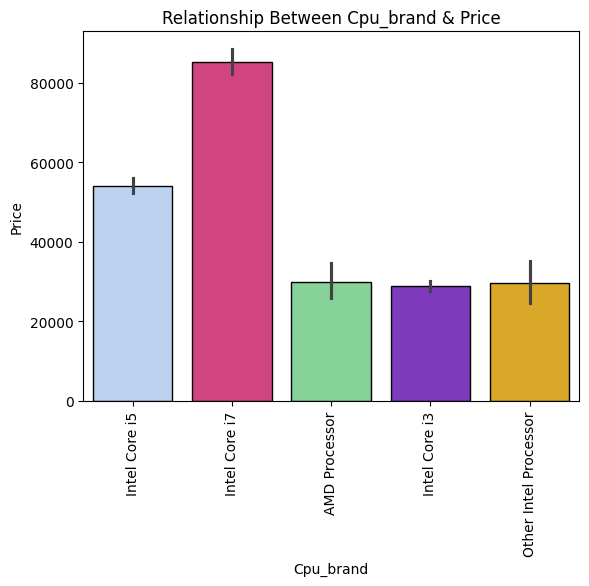

In [795]:
sns.barplot(x=df_data['Cpu_brand'],y=df_data['Price'], palette=['#B4CFFA','#E72E7C', '#79DE92', '#7E25D0', '#F8B50A'], edgecolor='black')
plt.title("Relationship Between Cpu_brand & Price")
plt.xticks(rotation='vertical')
plt.show()

**This clear distinction in pricing based on CPU types.**

The price of the Intel Core i7 processor is higher, after that Intel Core i5 processors are expensive and Intel Core i3, AMD Processors and  Other Intel Processorlies in almost the same range.

 Newer CPU technologies, such as the i7, command higher prices, often exceeding 80,000, while i5 processors are typically priced around 50,000. AMD Processor, Intel Core i3, and Other Intel Processors are more budget-friendly, averaging around 30,000.

In [796]:
#drop the Cpu column
df_data.drop(columns=['Cpu'],inplace=True)
df_data.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Cpu_brand
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,Intel Core i5
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,Intel Core i5
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Intel Core i5
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,Intel Core i7
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,Intel Core i5


**6. Relation between Price and Ram**

In [797]:
df_data['Ram'].value_counts()

Ram
8     631
4     367
16    194
6      40
12     25
2      22
32     17
64      3
24      3
1       1
Name: count, dtype: int64

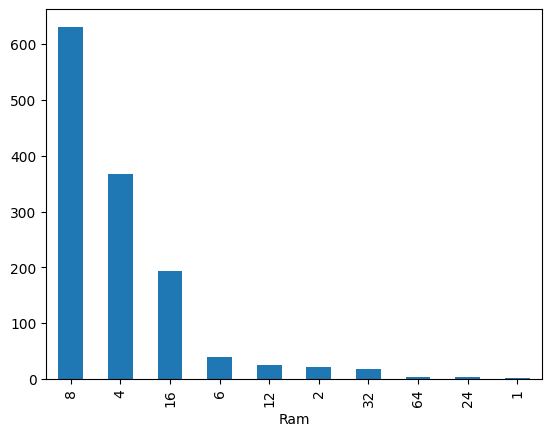

In [798]:
df_data['Ram'].value_counts().plot(kind='bar')
plt.show()

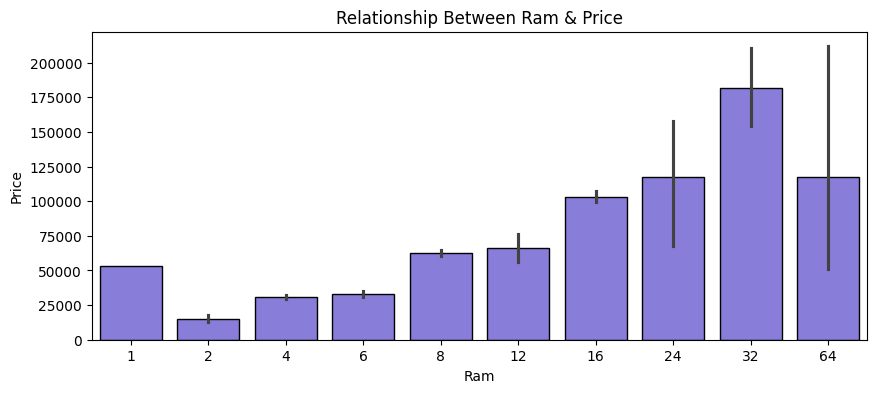

In [799]:
plt.figure(figsize=(10, 4))
sns.barplot(x=df_data['Ram'],y=df_data['Price'], color = '#7D6EE7', edgecolor='black')
plt.title("Relationship Between Ram & Price")
plt.show()

Higher RAM capacity correlates with higher prices.

This direct relationship makes RAM an essential feature to consider for predicting laptop prices.

**7. Memory column**

In [800]:
#extract numerical values from Memory column
df_data['Memory'] = df_data['Memory'].str.extract('(\d+)').astype(float)

In [801]:
df_data['Memory'].value_counts()

Memory
256.0    526
1.0      243
128.0    173
512.0    138
500.0    130
32.0      44
64.0      16
2.0       16
16.0      10
180.0      4
240.0      1
8.0        1
508.0      1
Name: count, dtype: int64

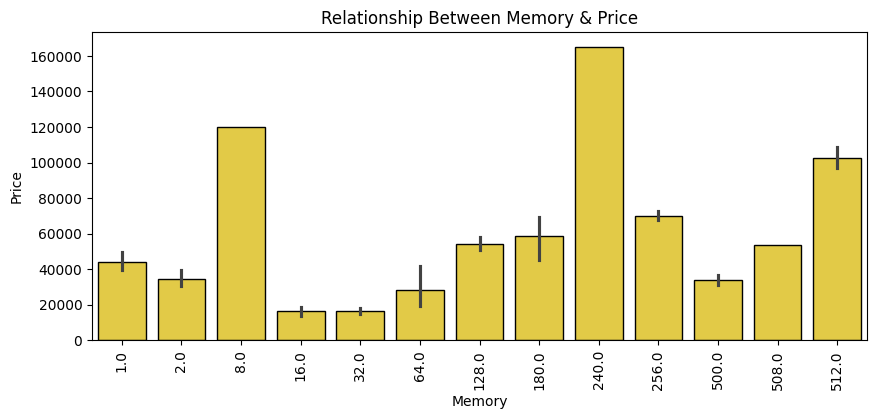

In [802]:
plt.figure(figsize=(10, 4))
sns.barplot(x=df_data['Memory'], y=df_data['Price'], color = '#FCDC2D', edgecolor='black')
plt.title("Relationship Between Memory & Price")
plt.xticks(rotation="vertical")
plt.show()

**8. Relationship with GPU and Price**

In [803]:
df_data['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      301
Intel HD Graphics 520      181
Intel UHD Graphics 620      66
Nvidia GeForce GTX 1050     64
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

We do not having how many capacities like (6Gb, 12 Gb) graphic card is present. So we will simply extract the name of the brand and save the values in same variable.

In [804]:
#save the values in same variable
df_data['Gpu'] = df_data['Gpu'].apply(lambda x:x.split()[0])

In [805]:
df_data['Gpu'].value_counts()

Gpu
Intel     733
Nvidia    393
AMD       176
ARM         1
Name: count, dtype: int64

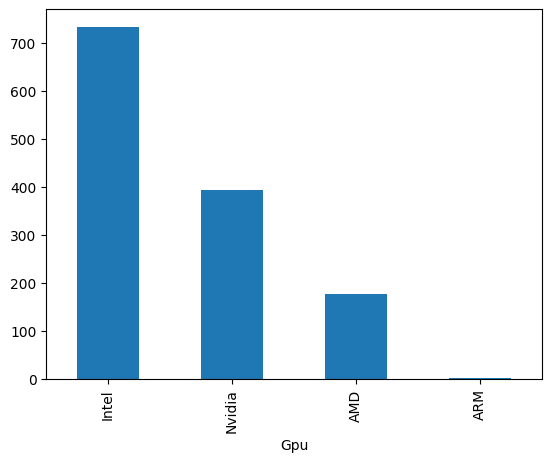

In [806]:
df_data['Gpu'].value_counts().plot(kind='bar')
plt.show()

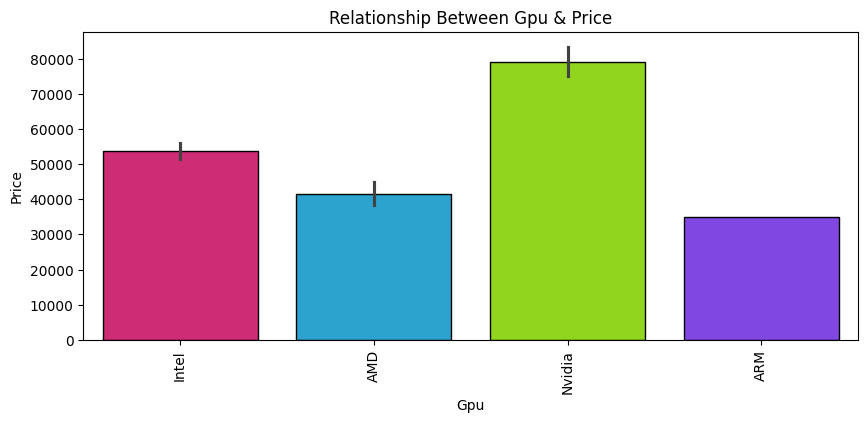

In [807]:
plt.figure(figsize=(10, 4))
sns.barplot(x=df_data['Gpu'], y=df_data['Price'], palette=['#EA1174','#11AFEA','#9AF300', '#7A2DFC'], edgecolor='black')
plt.title("Relationship Between Gpu & Price")
plt.xticks(rotation="vertical")
plt.show()

Nvidia has emerged as an expensive option, consistently commanding an average price of around 75,000. Intel is moderately priced than Nvidia and Intel also has the highest count. On the other hand, AMD is more budget-friendly.

This difference in GPU brands proves to be a valuable feature for predicting laptop prices.

**9. Operating System Column**

In [808]:
df_data['OpSys'].value_counts()

OpSys
Windows 10      1077
No OS             63
Linux             61
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

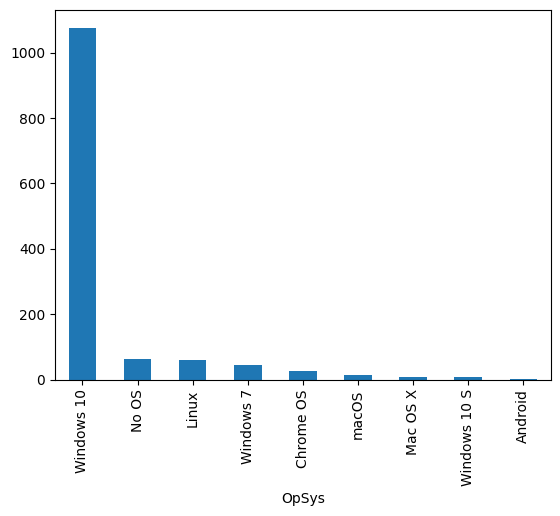

In [809]:
df_data['OpSys'].value_counts().plot(kind='bar')
plt.show()

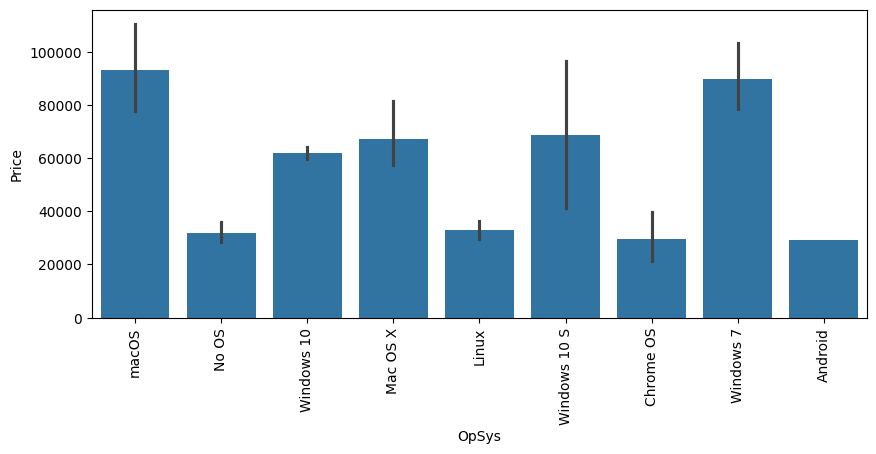

In [810]:
plt.figure(figsize=(10, 4))
sns.barplot(x=df_data['OpSys'], y=df_data['Price'])
plt.xticks(rotation="vertical")
plt.show()

There are many categories of operating systems. So I decided to collapse this into only 3 categories (Mac, Windows, Others/No OS/Linux).

In [811]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'
df_data['Operating_System'] = df_data['OpSys'].apply(cat_os)

In [812]:
df_data['Operating_System'].value_counts()

Operating_System
Windows               1130
Others/No OS/Linux     152
Mac                     21
Name: count, dtype: int64

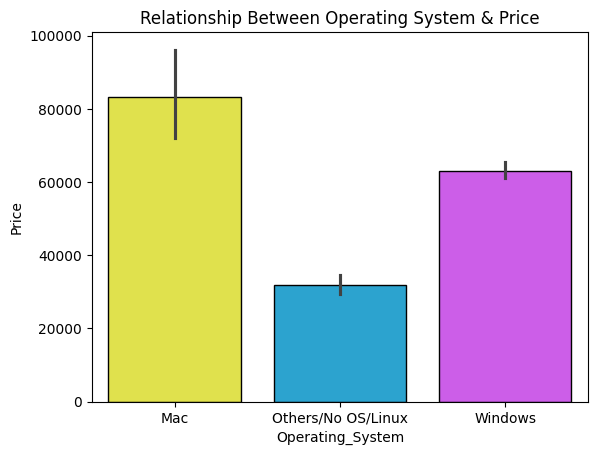

In [813]:
sns.barplot(x=df_data['Operating_System'],y=df_data['Price'], palette=['#F8FA34','#11AFEA','#DA47FF'], edgecolor='black')
plt.title("Relationship Between Operating System & Price")
plt.show()

There are 3 categories of operating systems but when we plot the graph price against the operating system then as usual Mac is the most expensive.


In [814]:
#drop the OpSys column
df_data.drop(columns=['OpSys'],inplace=True)
df_data.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,Weight,Price,Touchscreen,Ips,Cpu_brand,Operating_System
0,Apple,Ultrabook,13.3,8,128.0,Intel,1.37,71378.6832,0,1,Intel Core i5,Mac
1,Apple,Ultrabook,13.3,8,128.0,Intel,1.34,47895.5232,0,0,Intel Core i5,Mac
2,HP,Notebook,15.6,8,256.0,Intel,1.86,30636.0000,0,0,Intel Core i5,Others/No OS/Linux
3,Apple,Ultrabook,15.4,16,512.0,AMD,1.83,135195.3360,0,1,Intel Core i7,Mac
4,Apple,Ultrabook,13.3,8,256.0,Intel,1.37,96095.8080,0,1,Intel Core i5,Mac


**10. Weight and Price**

In [815]:
df_data['Weight'].value_counts()

Weight
2.2     142
2.1      57
2.4      43
2.3      41
2.5      37
       ... 
1.39      1
11.1      1
1.14      1
3.8       1
4.0       1
Name: count, Length: 188, dtype: int64

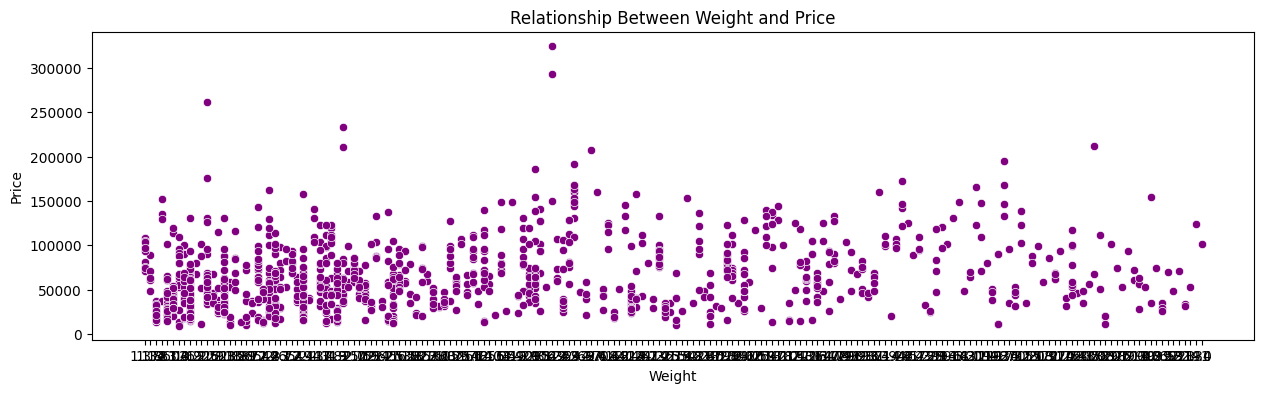

In [816]:
plt.figure(figsize=(15, 4))
sns.scatterplot(x=df_data['Weight'],y=df_data['Price'], c='purple')
plt.title('Relationship Between Weight and Price')
plt.show()

We can conclude that there is a relationship but not a strong relationship between the Price and Weight variable.

In [817]:
#Finding the correlation between numeric columns
numeric_df = df_data.select_dtypes(include= ['int', 'float'])
numeric_df.corr().loc[:, 'Price']

Inches         0.043761
Ram            0.685649
Memory         0.298595
Price          1.000000
Touchscreen    0.190509
Ips            0.256578
Name: Price, dtype: float64

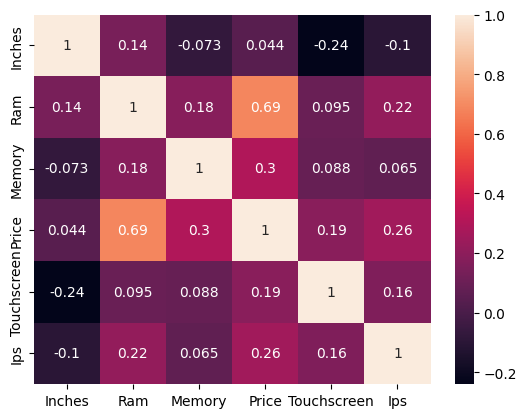

In [818]:
sns.heatmap(df_data[["Inches", "Ram", "Memory", "Price", "Touchscreen", "Ips"]].corr(),annot=True)
plt.show()

From the above plot we can conclude that Ram has moderate positive linear association with Price (0.69) column. Other features don't influece the Price.

In [819]:
#create the copy of df
df_data_model = df_data.copy()

In [820]:
df_data_model.head(2)

,Company,TypeName,Inches,Ram,Memory,Gpu,Weight,Price,Touchscreen,Ips,Cpu_brand,Operating_System
0,Apple,Ultrabook,13.3,8,128.0,Intel,1.37,71378.6832,0,1,Intel Core i5,Mac
1,Apple,Ultrabook,13.3,8,128.0,Intel,1.34,47895.5232,0,0,Intel Core i5,Mac


#Data Split & Perform the Model Training & Evalution

In [821]:
#Spliting independent variable and target variable
X = df_data_model.drop(columns=['Price'])
y = df_data_model['Price']

In [822]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [823]:
categorical_features = ["Company", "TypeName", "Gpu", "Cpu_brand", "Operating_System"]
numerical_features = ["Inches", "Ram", "Memory", "Weight", "Touchscreen", "Ips"]
preprocesseor = ColumnTransformer(transformers = [('Number', StandardScaler(), numerical_features), ('Encoder', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

In [824]:
from sklearn.model_selection import train_test_split #this is the function that we will use to perform the 80(training) and 20(testing)
#it takes the 4 parameters = (X,y, test_size = 0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
#random_state hepls you with reproducebility, random_state value = 0 or 42

In [825]:
X_train.shape #for training

(1042, 11)

In [826]:
y_test.shape #for testing

(261,)

#Perform The Linear Regression

In [827]:
# create the pipeline with linear regression model
from sklearn.linear_model import LinearRegression
lin_reg = Pipeline(steps=[('preprocessor', preprocesseor), ('regressor', LinearRegression())])

In [828]:
# training
lin_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Number', StandardScaler(),
                                                  ['Inches', 'Ram', 'Memory',
                                                   'Weight', 'Touchscreen',
                                                   'Ips']),
                                                 ('Encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Company', 'TypeName', 'Gpu',
                                                   'Cpu_brand',
                                                   'Operating_System'])])),
                ('regressor', LinearRegression())])

In [829]:
# test the model
y_pred = lin_reg.predict(X_test)

In [830]:
# calculate the mean squared error
from sklearn.metrics import mean_squared_error, r2_score
MSE = mean_squared_error(y_test, y_pred)
print('Linear Regression MSE', MSE)
# calculate the root mean squared error
RMSE = np.sqrt(MSE)
print('Linear Regression RMSE', RMSE)
#calculate the r2_score
r2_lin = r2_score(y_test, y_pred)
print ('R2_Score', r2_lin)

Linear Regression MSE 609401319.569259
Linear Regression RMSE 24686.055164186502
R2_Score 0.6340044048795705


#Perform The Random Forest

In [831]:
#create the pipeline with random forest regression model
from sklearn.ensemble import RandomForestRegressor
random_reg = Pipeline(steps=[('preprocessor', preprocesseor), ('regressor', RandomForestRegressor())])

In [832]:
#training
random_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Number', StandardScaler(),
                                                  ['Inches', 'Ram', 'Memory',
                                                   'Weight', 'Touchscreen',
                                                   'Ips']),
                                                 ('Encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Company', 'TypeName', 'Gpu',
                                                   'Cpu_brand',
                                                   'Operating_System'])])),
                ('regressor', RandomForestRegressor())])

In [833]:
#test the model
y_pred = random_reg.predict(X_test)

In [834]:
# calculate the mean squared error
from sklearn.metrics import mean_squared_error, r2_score
MSE = mean_squared_error(y_test, y_pred)
print('Random Forest MSE', MSE)
# calculate the root mean squared error
RMSE = np.sqrt(MSE)
print('Random Forest RMSE', RMSE)
#calculate the r2_score
r2_lin = r2_score(y_test, y_pred)
print ('R2_Score', r2_lin)

Random Forest MSE 380058007.22338146
Random Forest RMSE 19495.07648672817
R2_Score 0.7717439197008545


#Perform The XGBoost Regressor

In [835]:
#create the pipeline with XGBoost regression model
from xgboost import XGBRegressor
XGB_reg = Pipeline(steps=[('preprocessor', preprocesseor), ('regressor', XGBRegressor())])

In [836]:
#training
XGB_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Number', StandardScaler(),
                                                  ['Inches', 'Ram', 'Memory',
                                                   'Weight', 'Touchscreen',
                                                   'Ips']),
                                                 ('Encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Company', 'TypeName', 'Gpu',
                                                   'Cpu_brand',
                                                   'Operating_System'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=N...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [837]:
#test the model
y_pred = XGB_reg.predict(X_test)

In [838]:
# calculate the mean squared error
from sklearn.metrics import mean_squared_error, r2_score
MSE = mean_squared_error(y_test, y_pred)
print('XGBoost Regressor MSE', MSE)
# calculate the root mean squared error
RMSE = np.sqrt(MSE)
print('XGBoost Regressor RMSE', RMSE)
#calculate the r2_score
r2_lin = r2_score(y_test, y_pred)
print ('R2_Score', r2_lin)

XGBoost Regressor MSE 444843537.68296427
XGBoost Regressor RMSE 21091.314271115592
R2_Score 0.7328348822335458


The Random Forest Regressor model provides the lowest RMSE score and
I evaluated the R2 score.

The R2 score measures the amount of variance of the prediction which is explained by the dataset. If the value of the R2 score is 1, it means the model is perfect, and if it’s 0, it means the model will perform badly. The closer the value of the R2 is to 1, the more perfectly the model is trained.

Finally we use this model for creating a Gradio Application.

#Create A Gradio Application

In [839]:
# Convert yes/no to int
def get_int(value):
  if value == 'Yes':
    return 1
  else:
    return 0

In [840]:
# create a gradio application
def prediction(Company, TypeName, Inches, Ram, Memory, Gpu, Weight, Touchscreen, Ips, Cpu_brand, Operating_System):
  inputs_df = pd.DataFrame([[Company, TypeName, Inches, Ram, Memory, Gpu, Weight, get_int(Touchscreen), get_int(Ips), Cpu_brand, Operating_System]],
                           columns= ["Company", "TypeName", "Inches", "Ram", "Memory", "Gpu", "Weight", "Touchscreen", "Ips", "Cpu_brand", "Operating_System"])
  output=random_reg.predict(inputs_df)  #[[]] double list indicate we are passing this information as dataframe
  return round(output[0], 2)

In [841]:
prediction("Apple", "Ultrabook", 13.3, 8, 128.0, "Intel", 1.37, "No", "Yes", "Intel Core i5", "Mac")

69687.59

In [842]:
%%capture
pip install gradio

In [843]:
#create gradio application and add dropdown for categorical variables
import gradio as gr
company_name = gr.Dropdown(label = "Company", choices = ['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
                                                        'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
                                                        'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'])
typename_menu = gr.Dropdown(label = 'Typename', choices = ['Ultrabook', 'Notebook', 'Gaming', '2 in 1 Convertible', 'Workstation', 'Netbook'])
inches_input = gr.Dropdown(label = 'Inches', choices = [15.6, 14.0, 17.3, 13.3, 12.5, 11.6, 12.0, 13.9, 13.5, 12.3, 15.4,
                                                      15.0, 35.6, 10.1, 24.0, 13.0, 18.4, 27.3, 33.5, 31.6, 17.0, 14.1, 11.3, 25.6])
ram_input = gr.Dropdown(label = 'Ram', choices = [8, 4, 16, 6, 12, 2, 32, 64, 24, 1])
memory_input = gr.Dropdown(label = 'Memory', choices = [256.0, 1.0, 128.0, 512.0, 500.0, 32.0, 64.0, 2.0, 16.0, 180.0, 240.0, 8.0, 508.0])
gpu_menu = gr.Dropdown(label = 'Gpu', choices = ['Intel', 'AMD', 'Nvidia', 'ARM'])
weight_input = gr.Dropdown(label = 'Weight', choices=[1.37,1.34, 1.86, 1.83, 2.1, 2.04, 1.3, 1.6, 2.2, 0.92, 1.22, 2.5, 1.62, 1.91, 2.3, 1.35, 1.88,
                                                      1.89, 1.65, 2.71, 1.2, 1.44, 2.8, 2, 2.65, 2.77, 3.2, 1.49, 2.4, 2.13, 2.43, 1.7, 1.4, 1.8, 1.9,
                                                      3, 1.252, 2.7, 2.02, 1.63, 1.96, 1.21, 2.45, 1.25, 1.5, 2.62, 1.38, 1.58, 1.85, 1.23, 2.16,
                                                      2.36, 7.2, 2.05, 1.32, 1.75, 0.97, 2.56, 1.48, 1.74, 1.1, 1.56, 2.03, 1.05, 5.4, 4.4, 1.90,
                                                      1.29, 2.0, 1.95, 2.06, 1.12, 3.49, 3.35, 2.23, 2.9, 4.42, 2.69, 2.37, 4.7, 3.6, 2.08, 4.3, 1.68,
                                                      1.41, 4.14, 2.18, 2.24, 2.67, 4.1, 2.14, 1.36, 2.25, 2.15, 2.19, 2.54, 3.42, 5.8, 1.28, 2.33,
                                                      1.45, 2.79, 8.23, 1.26, 1.84, 0.0002, 2.6, 2.26, 3.25, 1.59, 1.13, 1.42, 1.78, 1.10, 1.15, 1.27,
                                                      1.43, 2.31, 1.16, 1.64, 2.17, 1.47, 3.78, 1.79, 0.91, 1.99, 4.33, 1.93, 1.87, 2.63, 3.4, 3.14,
                                                      1.94, 1.24, 4.6, 4.5, 8.4, 2.73, 1.39, 2.29, 2.59, 2.94, 11.1, 1.14, 3.8, 6.2, 3.31, 1.09,
                                                      3.21, 1.19, 1.98, 1.17, 4.36, 1.71, 2.32, 4.2, 1.55, 0.81, 1.18, 2.72, 1.31, 0.920, 3.74, 1.76,
                                                      1.54, 2.83, 2.07, 2.38, 3.58, 1.08, 2.20, 0.98, 2.75, 1.70, 2.99, 1.11, 2.09, 4, 3.0, 0.99, 0.69,
                                                      3.52, 2.591, 2.21, 3.3, 2.191, 2.34, 4.0])
touchscreen_menu = gr.Dropdown(label = 'Touchscreen', choices = ["Yes", "No"])
ips_menu = gr.Dropdown(label = 'Ips', choices = ["Yes", "No"])
cpu_brand_menu = gr.Dropdown(label = 'Cpu_brand', choices = ['Intel Core i7', 'Intel Core i5', 'Intel Core i3', 'Other Intel Processor', 'AMD Processor'])
os_menu = gr.Dropdown(label = 'Operating_System', choices = ['Windows', 'Mac', 'Others/No OS/Linux'])

In [844]:
demo = gr.Interface (fn = prediction, inputs = [company_name, typename_menu, inches_input, ram_input, memory_input, gpu_menu,
                                                weight_input, touchscreen_menu, ips_menu, cpu_brand_menu, os_menu],
                     outputs = gr.Number(label = "Predicted Laptop Price"))
#gr has class called Interface that will take multiple parameter
# 1 parameter = it takes function name(fn) what is the function we created prediction
# 2 parameter = inputs (inputs columns)
# 3 parameter = Number (it will give output in form of number for text output we will write Textbox ())

In [845]:
#launch the gradio app and put share as True
demo.launch(share = True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://037756854da2db1964.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
